### Candidate number: 1030
***
## Exercise 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

There was a problem with yfinance when downloading data using start and end keyword arguments. The data is therefore loaded with the period kwarg, then indexed using start and stop dates.

In [124]:
# Stock data class for storing stock data
class StockData:
    def __init__(self, tickers, start, end, names, period='11Y'):
        self.tickers = tickers
        self.names = {self.tickers[i]: names[i] for i in range(len(tickers))}
        self.df = yf.download(self.tickers, period=period, ignore_tz=True, progress=False)
        self.close = pd.DataFrame(self.df['Adj Close']).loc['2013-01-01':'2023-05-31']
        self.returns = np.log(self.close/self.close.shift()).dropna()

# Ticker symbols:
tickers = ['AAPL', 'MSFT', 'BP', 'JNJ', 'NVS', 'KO', 'UL', 'JPM', 'BCS', 'SONY', '^GSPC']
# Stock names:
stock_names = ['Apple', 'Microsoft', 'BP plc', 'Johnson & Johnson', 'Novartis AG', 'The Coca Cola Company ', 'Unilever Plc', 'JP Morgan Chase & Co', 'Barclays Plc', 'Sony', 'S&P 500']
# Stock data:
data = StockData(tickers, '2013-01-01', '2023-05-31', names=stock_names)


The data set is checked for the following:

1. Checking for NaN values

2. Checking for duplicates

3. Checking for outliers


,NaN Values,Duplicates,Outliers
Apple,0,39,0
Microsoft,0,106,0
BP plc,0,211,0
Johnson & Johnson,0,75,0
Novartis AG,0,248,0
The Coca Cola Company,0,238,0
Unilever Plc,0,211,0
JP Morgan Chase & Co,0,89,0
Barclays Plc,0,579,0
Sony,0,428,0


,AAPL,BCS,BP,JNJ,JPM,KO,MSFT,NVS,SONY,UL,^GSPC
count,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00,2621.00
mean,64.21,9.17,26.57,114.52,85.46,41.36,122.92,65.88,51.89,42.23,2794.21
std,51.65,2.43,5.07,33.29,36.09,10.37,93.89,13.22,30.48,8.89,892.81
min,12.03,3.54,13.04,53.10,33.49,26.69,21.72,38.31,10.72,27.03,1457.15
25%,24.97,7.40,23.10,82.62,49.54,32.72,41.63,56.06,26.01,33.30,2060.31
50%,40.82,8.78,25.70,114.17,87.41,38.44,87.69,63.62,47.06,44.65,2647.58
75%,115.58,11.33,30.37,138.68,112.08,48.84,209.13,77.40,76.45,49.81,3478.73
max,180.43,14.82,40.51,179.75,164.02,64.31,338.34,104.91,128.59,57.45,4796.56


Text(0.5, 1.0, 'Cumulative log-return of stock data')

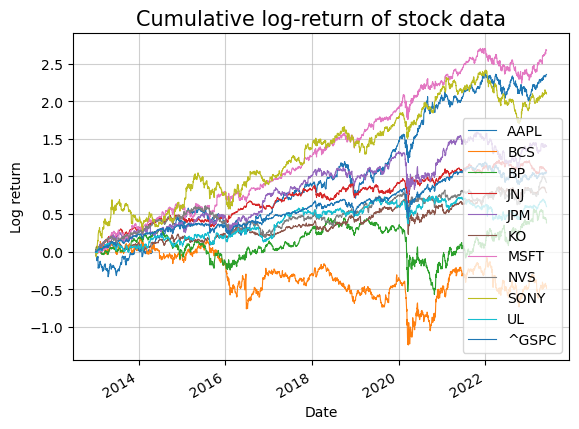

In [133]:
# Creating a result dataframe:
results = pd.DataFrame(columns=tickers)

# Checking NaN values:
results.loc[0] = data.close.isna().sum()

# Checking for duplicates:
results.loc[1] = [data.close[ticker].duplicated().sum() for ticker in tickers]

# Checking for outliers by calculating z-score:
z_scores = [(data.close[ticker] - data.close[ticker].mean())/data.close.std() for ticker in tickers]
results.loc[2] = [z_score[(z_score > 3)].count() for z_score in z_scores]

# Displaying results in table format:
display(results.rename({0:'NaN Values', 1:'Duplicates', 2:'Outliers'}).T.rename(data.names))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(data.close.describe())

# Plotting the log-returns of the data to check for abnormalities
data.returns.cumsum().plot(linewidth=0.8, ylabel='Log return');
plt.grid(alpha=0.6)
plt.title('Cumulative log-return of stock data', fontsize=15)

#### Discussion

Duplicate values are oftentimes observed in stock prices due to the market's behavior and trends. Extreme values, on the other hand, may be caused by significant events that affect the market, such as economic recessions or political changes. The occurence of duplicate values and outliers would therefore not be a problem in the dataset, as long as their not caused by errors. 

It does not seem that there were any abnormalities by inspecting the plotted data and there were no NaN values in the dataset. Therefore there would be no need to clean the dataset.
